In [ ]:
import pandas as pd
import pickle

In [105]:
kbo = pd.read_pickle("./kbo_detail.pkl")

In [106]:
kbo[['team','선수명']]

,team,선수명
0,한화 이글스,강재민
1,한화 이글스,권광민
2,한화 이글스,권동욱
3,한화 이글스,권현
4,한화 이글스,김강민
...,...,...
839,KT 위즈,한민우
840,KT 위즈,한차현
841,KT 위즈,홍현빈
842,KT 위즈,황의준


In [110]:
kbo['신장'] = kbo['신장/체중'].apply(lambda x : int(x.split("/")[0].replace("cm", "")))

In [111]:
kbo['체중'] = kbo['신장/체중'].apply(lambda x : int(x.split("/")[1].replace("kg", "")))

In [112]:
kbo['BMI']  = kbo['체중'] / (kbo['신장']/100)**2

In [113]:
kbo.sort_values(by='BMI', ascending=False).head()

,선수명,등번호,생년월일,포지션,신장/체중,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
10,김민우,No.53,1995년 07월 25일,투수(우투우타),186cm/123kg,사파초-마산중-용마고,20000만원,16700만원,15 한화 2차 1라운드 1순위,15한화,한화 이글스,186,123,35.553243
356,김범석,No.55,2004년 05월 21일,포수(우투우타),178cm/110kg,김해삼성초-경남중-경남고,25000만원,3300만원,23 LG 1라운드 7순위,23LG,LG 트윈스,178,110,34.717839
30,박성웅,No.63,1999년 08월 20일,투수(좌투좌타),178cm/109kg,광주서석초-충장중-광주제일고,10000만원,3300만원,18 한화 2차 2라운드 14순위,18한화,한화 이글스,178,109,34.402222
57,이성원,No.98,1999년 11월 02일,내야수(우투우타),185cm/115kg,수원신곡초-매향중-장안고,6000만원,3000만원,18 한화 2차 6라운드 54순위,,한화 이글스,185,115,33.601169
509,김기연,No.45,1997년 09월 07일,포수(우투우타),178cm/106kg,광주수창초-진흥중-진흥고-LG,7000만원,4000만원,16 LG 2차 4라운드 34순위,17LG,두산 베어스,178,106,33.455372


In [115]:
kbo.drop(['신장/체중'], axis=1, inplace=True)

In [116]:
kbo2 = kbo.groupby('team')[['신장', '체중']].mean()

In [117]:
kbo2.loc[ 'KIA 타이거즈' , :  ]

신장    182.773810
체중     88.666667
Name: KIA 타이거즈, dtype: float64

In [118]:
kbo2.loc[ 'KIA 타이거즈':'SSG 랜더스' , '신장'  ]

team
KIA 타이거즈    182.773810
KT 위즈       182.103448
LG 트윈스      182.986486
NC 다이노스     183.146067
SSG 랜더스     181.975309
Name: 신장, dtype: float64

In [119]:
kbo2.iloc[2:4, 0]

team
LG 트윈스     182.986486
NC 다이노스    183.146067
Name: 신장, dtype: float64

In [120]:
kbo.groupby('team')[['신장', '체중']].agg(['mean', 'median', 'min', 'max', 'var', 'std' ])

신장                                               체중         \
                mean median  min  max        var       std       mean median   
team                                                                           
KIA 타이거즈  182.773810  183.0  165  195  23.044607  4.800480  88.666667   87.0   
KT 위즈     182.103448  183.0  170  193  23.024058  4.798339  85.390805   85.0   
LG 트윈스    182.986486  183.0  171  194  26.177897  5.116434  87.270270   85.5   
NC 다이노스   183.146067  183.0  171  196  23.194331  4.816049  87.089888   86.0   
SSG 랜더스   181.975309  182.0  165  193  25.324383  5.032334  86.148148   88.0   
고양 히어로즈   181.739130  182.0  173  188  13.928854  3.732138  84.347826   83.0   
두산 베어스    183.166667  183.0  175  195  22.236948  4.715607  87.261905   88.5   
롯데 자이언츠   183.282353  182.0  172  197  25.300280  5.029938  88.988235   88.0   
삼성 라이온즈   182.482353  183.0  163  198  30.752661  5.545508  87.376471   87.0   
키움 히어로즈   181.016949  181.0  169  194  26.534191  5.151135  87.288136   88.0   
한화 이글스    182.473118  183.0  173  192  18.578074  4.310229  88.817204   89.0   

                                          
         min  max         var        std  
team                                      
KIA 타이거즈  68  108   77.502008   8.803522  
KT 위즈     68  107   68.357124   8.267837  
LG 트윈스    67  110   95.734173   9.784384  
NC 다이노스   69  115   61.969101   7.872046  
SSG 랜더스   65  108   76.027778   8.719391  
고양 히어로즈   73  105   79.873518   8.937199  
두산 베어스    68  106   81.834194   9.046225  
롯데 자이언츠   72  118   79.202241   8.899564  
삼성 라이온즈   62  113   91.761345   9.579214  
키움 히어로즈   73  109   68.277615   8.263027  
한화 이글스    65  123  103.498831  10.173438

In [121]:
kbo['경력'].apply(lambda x : x.split('-')[0]).value_counts().reset_index().rename(columns={'count' : '명'})

,경력,명
0,부산수영초,19
1,가동초,14
2,양정초,14
3,본리초,13
4,광주대성초,13
...,...,...
345,거제제산초(거제리틀),1
346,영천초,1
347,양남초(하남시리틀),1
348,신기초(금천구리틀),1


In [122]:
kbo[kbo['경력'].str.find("부산수영초") > -1]['team'].value_counts()

team
롯데 자이언츠     5
한화 이글스      3
SSG 랜더스     3
LG 트윈스      3
KIA 타이거즈    1
NC 다이노스     1
키움 히어로즈     1
두산 베어스      1
삼성 라이온즈     1
Name: count, dtype: int64

In [123]:
kbo['생년월일'][0]

' 1997년 04월 03일'

In [124]:
from datetime import date, datetime
kbo['생년월일'] = kbo['생년월일'].apply(lambda x : datetime.strptime(x.replace(" ", ""), "%Y년%m월%d일"))

In [125]:
(datetime.now() - kbo['생년월일'][0])

Timedelta('10464 days 16:16:22.199021')

In [126]:
kbo['생년월일'][0].year

1997

In [127]:
# 현재 야구선수들은 태어나서 몇일 살았나?
# 나이

In [128]:
kbo['생년월일'].apply(lambda x : (datetime.now() - x).days)

0      10464
1      10211
2       9088
3       7581
4      15780
       ...  
839     9710
840     9858
841    10316
842     8635
843    14001
Name: 생년월일, Length: 844, dtype: int64

In [129]:
kbo['나이'] = kbo['생년월일'].apply(lambda x : datetime.now().year - x.year)

In [130]:
kbo['생년월일'].apply(lambda x : x.weekday()).value_counts()

생년월일
4    167
1    138
0    129
5    112
3    108
2    104
6     86
Name: count, dtype: int64

In [131]:
kbo.sort_values(by=['신장'], ascending=False).groupby(['team']).first()

,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,신장,체중,BMI,나이
team,,,,,,,,,,,,,
KIA 타이거즈,홍원빈,No.021,2000-10-16,투수(우투우타),안말초-강남중-덕수고,13000만원,3000만원,19 KIA 2차 1라운드 10순위,19KIA,195,101,26.561473,25
KT 위즈,이준명,No.101,2002-12-18,투수(우투우타),정목초(강서구리틀)-덕수중-성남고-동의대(얼리 드래프트),3000만원,3000만원,23 KT 10라운드 100순위,,193,100,26.846358,23
LG 트윈스,허용주,No.111,2003-06-05,투수(우투우타),사파초-마산동중-용마고,5000만원,3000만원,23 LG 7라운드 67순위,,194,88,23.381868,22
NC 다이노스,하트,No.30,1992-11-23,투수(좌투좌타),미국 Indiana(대),200000달러,500000달러,24 NC 자유선발,24NC,196,90,23.427738,33
SSG 랜더스,서상준,No.61,2000-01-14,투수(우투좌타),동일중앙초-야로중-영문고,4000만원,3200만원,19 SK 2차 7라운드 66순위,23SSG,193,108,28.994067,25
고양 히어로즈,조성훈,No.100,1999-03-22,투수(우투우타),응봉초(성동구리틀)-건대부중-청원고-SK-상무-SK-SSG,15000만원,3100만원,18 SK 2차 1라운드 5순위,18SK,188,85,24.049344,26
두산 베어스,이상연,No.103,2001-08-10,투수(우투우타),해원초(수영구리틀)-대천중-부산고,4000만원,3000만원,21 두산 2차 6라운드 60순위,,195,103,27.087442,24
롯데 자이언츠,윤성빈,No.103,1999-02-26,투수(우투우타),동일중앙초-경남중-부산고,45000만원,3100만원,17 롯데 1차,17롯데,197,90,23.190497,26
삼성 라이온즈,레예스,No.43,1996-11-02,투수(우투우타),도미니카 Melida Altagracia Baez(고),100000달러,500000달러,24 삼성 자유선발,24삼성,198,113,28.823589,29


In [132]:
kbo

,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI,나이
0,강재민,No.,1997-04-03,투수(우언우타),양덕초-마산중-용마고-단국대,8000만원,14500만원,20 한화 2차 4라운드 38순위,20한화,한화 이글스,180,89,27.469136,28
1,권광민,No.17,1997-12-12,외야수(좌투좌타),서울청구초-홍은중-장충고,,3300만원,22 한화 2차 5라운드 41순위,16시카고컵스,한화 이글스,189,102,28.554632,28
2,권동욱,No.02,2001-01-08,외야수(우투우타),가동초-휘문중-배명고-동국대,,3000만원,24 한화 육성선수,,한화 이글스,173,85,28.400548,24
3,권현,No.111,2005-02-23,외야수(우투우타),사당초-언북중-장충고,3000만원,3000만원,24 한화 10라운드 91순위,,한화 이글스,182,88,26.566840,20
4,김강민,No.9,1982-09-13,외야수(우투우타),본리초-대구중-경북고-SK-SSG,11000만원,11000만원,01 SK 2차 2라운드 18순위,01SK,한화 이글스,182,87,26.264944,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,한민우,No.96,1999-04-27,투수(좌투좌타),동일중앙초-경남중-경남고,1000만원,3000만원,23 KT 육성선수,,KT 위즈,177,82,26.173833,26
840,한차현,No.59,1998-11-30,투수(우투우타),사능초(남양주리틀)-청원중-포항제철고-성균관대,10000만원,3100만원,21 KT 2차 2라운드 15순위,21KT,KT 위즈,180,80,24.691358,27
841,홍현빈,No.31,1997-08-29,외야수(우투좌타),수원신곡초-매송중-유신고-KT-상무,9000만원,4500만원,17 KT 2차 3라운드 21순위,17KT,KT 위즈,174,70,23.120624,28
842,황의준,No.103,2002-04-06,외야수(우투좌타),칠성초-경복중-경북고-수성대,4000만원,3000만원,23 KT 8라운드 80순위,,KT 위즈,185,95,27.757487,23


In [134]:
import requests

In [135]:
url = "https://www.kebhana.com/cms/rate/wpfxd651_01i_01.do"

In [136]:
payload = {"ajax":"true",
"pbldDvCd":"0",
"inqStrDt":"20251126",
"inqKindCd":"1",
"requestTarget":"searchContentDiv"}

In [137]:
exchange = pd.read_html(requests.post(url, data=payload).text)[0]

/tmp/ipykernel_74456/3789694309.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  exchange = pd.read_html(requests.post(url, data=payload).text)[0]


In [143]:
float(exchange[exchange.통화.str.find("미국") > -1]['사실 때_현찰_환율'].values[0])

1496.03

In [139]:
for x in exchange.columns:
  print("_".join(sorted(list(set(x)))))

통화
사실 때_현찰_환율
Spread_사실 때_현찰
파실 때_현찰_환율
Spread_파실 때_현찰
보낼 때_송금
받을 때_송금
외화 수표 파실때
매매 기준율
환가 료율
미화 환산율


In [141]:
exchange.columns = ["_".join(sorted(list(set(x)))) for x in exchange.columns]

In [142]:
master = {x[0] : x[1] for x in exchange['통화'].str.split().values}

In [144]:
# get_exchange
# 날짜, 나라명

In [145]:
def get_exchange( date_, country='미국', money = None):
  """
  date_ : 환율 날짜(YYYYMMDD)
  country : 국가
  return : 환율
  """
  url = "https://www.kebhana.com/cms/rate/wpfxd651_01i_01.do"
  payload = {"ajax":"true",
            "pbldDvCd":"0",
            "inqKindCd":"1",
            "requestTarget":"searchContentDiv"}
  payload['inqStrDt'] = date_
  exchange = pd.read_html(requests.post(url, data=payload).text)[0]
  exchange.columns = ["_".join(sorted(list(set(x)))) for x in exchange.columns]
  master = {x[0] : x[1] for x in exchange['통화'].str.split().values}
  if money is not None:
    return "{:,} ".format(round(money / float(exchange[exchange.통화.str.find(country) > -1]['사실 때_현찰_환율'].values[0]),2)) + master[country]
  else:
    return float(exchange[exchange.통화.str.find(country) > -1]['사실 때_현찰_환율'].values[0])

In [146]:
get_exchange("20251124", '미국', 1000000)

/tmp/ipykernel_74456/62316982.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  exchange = pd.read_html(requests.post(url, data=payload).text)[0]


'666.22 USD'

In [147]:
"{:,}".format(round(10000000.234243234,2))

'10,000,000.23'

In [148]:
usd = get_exchange("20251124", '미국')

/tmp/ipykernel_74456/62316982.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  exchange = pd.read_html(requests.post(url, data=payload).text)[0]


In [149]:
kbo.loc[kbo['연봉'].str.endswith('달러'), '연봉'] = kbo.loc[kbo['연봉'].str.endswith('달러'), '연봉'].apply(lambda x :
                                            round(int(x.replace('달러', '')) * usd/10000))

In [150]:
kbo

,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI,나이
0,강재민,No.,1997-04-03,투수(우언우타),양덕초-마산중-용마고-단국대,8000만원,14500만원,20 한화 2차 4라운드 38순위,20한화,한화 이글스,180,89,27.469136,28
1,권광민,No.17,1997-12-12,외야수(좌투좌타),서울청구초-홍은중-장충고,,3300만원,22 한화 2차 5라운드 41순위,16시카고컵스,한화 이글스,189,102,28.554632,28
2,권동욱,No.02,2001-01-08,외야수(우투우타),가동초-휘문중-배명고-동국대,,3000만원,24 한화 육성선수,,한화 이글스,173,85,28.400548,24
3,권현,No.111,2005-02-23,외야수(우투우타),사당초-언북중-장충고,3000만원,3000만원,24 한화 10라운드 91순위,,한화 이글스,182,88,26.566840,20
4,김강민,No.9,1982-09-13,외야수(우투우타),본리초-대구중-경북고-SK-SSG,11000만원,11000만원,01 SK 2차 2라운드 18순위,01SK,한화 이글스,182,87,26.264944,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,한민우,No.96,1999-04-27,투수(좌투좌타),동일중앙초-경남중-경남고,1000만원,3000만원,23 KT 육성선수,,KT 위즈,177,82,26.173833,26
840,한차현,No.59,1998-11-30,투수(우투우타),사능초(남양주리틀)-청원중-포항제철고-성균관대,10000만원,3100만원,21 KT 2차 2라운드 15순위,21KT,KT 위즈,180,80,24.691358,27
841,홍현빈,No.31,1997-08-29,외야수(우투좌타),수원신곡초-매송중-유신고-KT-상무,9000만원,4500만원,17 KT 2차 3라운드 21순위,17KT,KT 위즈,174,70,23.120624,28
842,황의준,No.103,2002-04-06,외야수(우투좌타),칠성초-경복중-경북고-수성대,4000만원,3000만원,23 KT 8라운드 80순위,,KT 위즈,185,95,27.757487,23


In [151]:
kbo[kbo['연봉'].apply(lambda x : str(x)[-2:] == "만원")].shape

(807, 14)

In [152]:
kbo.loc[kbo['연봉'].apply(lambda x : str(x)[-2:] == "만원"), '연봉'] = \
    kbo.loc[kbo['연봉'].apply(lambda x : str(x)[-2:] == "만원"), '연봉'].apply(lambda x :
                                                    int(x.replace("만원", "")))

In [153]:
kbo_salary = kbo.loc[kbo['연봉'] != ' ', :]

In [154]:
kbo_salary['연봉'].sum()

11937677

In [155]:
kbo_salary.groupby(['team'])[['연봉']].agg(['max', 'min', 'mean', 'median', 'std', 'count', 'sum'])

연봉                                                         
             max   min          mean  median           std count      sum
team                                                                     
KIA 타이거즈  100000  3000  12773.731707  3900.0  21055.024404    82  1047446
KT 위즈     200000  3000  15478.643678  3500.0  32557.012480    87  1346642
LG 트윈스    250000  3000  17273.283784  3600.0  37252.281023    74  1278223
NC 다이노스   100000  3000  11369.213483  3200.0  20385.274934    89  1011860
SSG 랜더스   172616  3000  16404.296296  3100.0  31858.781418    81  1328748
고양 히어로즈     4000  1500   2956.521739  3000.0    521.210206    23    68000
두산 베어스    150000  3000   13577.26506  3300.0  26522.086740    83  1126913
롯데 자이언츠   135000  3000  15275.388235  3900.0  29117.238093    85  1298408
삼성 라이온즈   200000  3000  14401.435294  4100.0  29969.739414    85  1224122
키움 히어로즈   180121  3000  16292.169492  4500.0  30104.493043    59   961238
한화 이글스    250000  3000  14000.865169  3500.0  32338.397967    89  1246077

In [156]:
kbo_salary.sort_values(by=['연봉'], ascending=False).groupby(['team']).first()

,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,신장,체중,BMI,나이
team,,,,,,,,,,,,,
KIA 타이거즈,최형우,No.34,1983-12-16,외야수(우투좌타),진북초-전주동중-전주고-삼성-경찰-삼성,5000만원,100000,02 삼성 2차 6라운드 48순위,02삼성,180,106,32.716049,42
KT 위즈,고영표,No.1,1991-09-16,투수(우언우타),광주대성초-광주동성중-화순고-동국대,13000만원,200000,14 KT 2차 1라운드 10순위,14KT,187,88,25.165146,34
LG 트윈스,박동원,No.27,1990-04-07,포수(우투우타),양정초-개성중-개성고-히어로즈-상무-히어로즈-키움-KIA,6000만원,250000,09 히어로즈 2차 3라운드 19순위,09히어로즈,178,92,29.036738,35
NC 다이노스,박민우,No.2,1993-02-06,내야수(우투좌타),마포초(용산구리틀)-선린중-휘문고,16000만원,100000,12 NC 1라운드 9순위,12NC,185,80,23.374726,32
SSG 랜더스,에레디아,No.27,1991-01-31,외야수(좌투우타),쿠바 Eide Luis Agusto Tursios Lima,,172616,23 SSG 자유선발,23SSG,178,88,27.774271,34
고양 히어로즈,윤정현,No.99,1993-05-17,투수(좌투좌타),서원초-세광중-세광고,,4000,19 넥센 2차 1라운드 4순위,13볼티모어,186,100,28.905076,32
두산 베어스,김재환,No.32,1988-09-22,외야수(우투좌타),영랑초-상인천중-인천고-두산-상무,15000만원,150000,08 두산 2차 1라운드 4순위,08두산,183,90,26.874496,37
롯데 자이언츠,박세웅,No.21,1995-11-30,투수(우투우타),대구경운초-경운중-경북고-KT,20000만원,135000,14 KT 1차,14KT,182,85,25.661152,30
삼성 라이온즈,구자욱,No.5,1993-02-12,외야수(우투좌타),본리초-경복중-대구고-삼성-상무,13000만원,200000,12 삼성 2라운드 12순위,12삼성,189,75,20.996053,32


In [157]:
kbo_salary[['신장', '체중', '연봉', '나이', 'BMI']].corr()

,신장,체중,연봉,나이,BMI
신장,1.000000,0.530494,0.141338,-0.050933,0.019272
체중,0.530494,1.000000,0.192960,0.093867,0.856448
연봉,0.141338,0.192960,1.000000,0.473122,0.138679
나이,-0.050933,0.093867,0.473122,1.000000,0.140404
BMI,0.019272,0.856448,0.138679,0.140404,1.000000


In [ ]:
# !pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 28.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 37.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]


In [ ]:
# !pip install seaborn

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

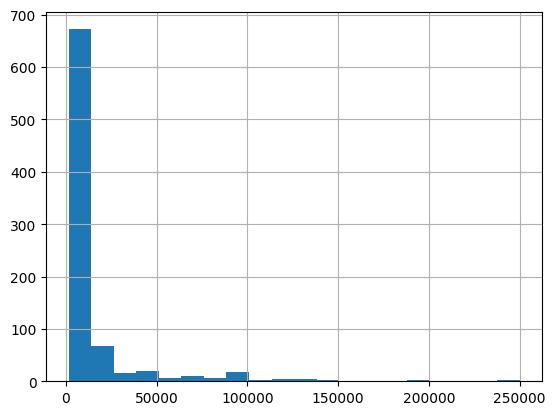

In [160]:
kbo_salary['연봉'].hist(bins=20)

In [163]:
import matplotlib.font_manager as fm
font_prop = fm.FontProperties(fname="./malgun.ttf")

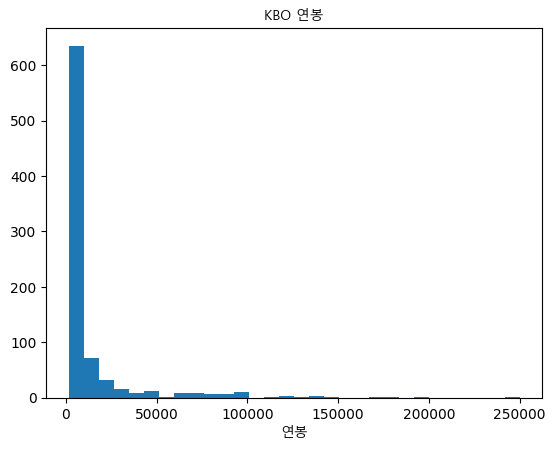

In [164]:
plt.hist(kbo_salary['연봉'], bins=30)
plt.title("KBO 연봉", fontproperties=font_prop)
plt.xlabel("연봉", fontproperties=font_prop)
plt.show()

In [ ]:
kbo_salary.to_pickle("./kbo_salary.pkl")

In [165]:
kbo_salary.team.unique()

array(['한화 이글스', 'KIA 타이거즈', 'SSG 랜더스', 'NC 다이노스', 'LG 트윈스', '키움 히어로즈',
       '고양 히어로즈', '두산 베어스', '롯데 자이언츠', '삼성 라이온즈', 'KT 위즈'], dtype=object)

In [166]:
kbo_salary.loc[kbo_salary['team'] == '한화 이글스', '연봉'].values

array([14500, 3300, 3000, 3000, 11000, 3200, 4100, 4400, 3000, 3000,
       16700, 19300, 3000, 3300, 3000, 3000, 6900, 6800, 3000, 3000, 7800,
       3000, 4000, 35000, 250000, 10000, 3000, 8000, 4200, 19500, 3300,
       3500, 5100, 75050, 3000, 3000, 3000, 3000, 3000, 3000, 50000, 3000,
       3600, 3000, 3000, 3300, 11000, 3000, 7500, 5000, 5600, 3100, 4400,
       3100, 3000, 3100, 3000, 3600, 3100, 5000, 7000, 3400, 50000, 3400,
       3200, 15000, 20000, 3200, 5800, 3000, 10000, 17800, 3000, 3000,
       3800, 11000, 100000, 4800, 60000, 3000, 97566, 90061, 7000, 3000,
       4500, 4900, 3300, 3000, 3000], dtype=object)